In [1]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg


# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

#Import Iris dataset
iris = datasets.load_iris()

In [2]:
df = yf.download(tickers='BTC-USD LTC-USD ETH-USD',start = '2021-09-02', end='2021-09-08',interval='5m')

[*********************100%***********************]  3 of 3 completed


In [3]:
df.head()

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48750.980469  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48774.902344  3715.760498  179.227707   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.483124   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48750.980469  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48774.902344  3715.760498  179.227707   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.483124   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48728.281250  3719.506348  180.125641   
2021-09-01 19:35:00+01:00  48750.980469  3719.143555  179.706375   
2021-09-01 19:40:00+01:00  48774.902344  3717.655029  179.610184   
2021-09-01 19:45:00+01:00  48775.972656  3712.702393  179.494339   
2021-09-01 19:50:00+01:00  48755.531250  3707.108887  179.566742   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48706.859375  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48757.027344  3715.760498  179.139511   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.391418   

                                   Open                             Volume  \
                                BTC-USD      ETH-USD     LTC-USD   BTC-USD   
Datetime                                                                     
2021-09-01 19:30:00+01:00  48728.281250  3719.506348  180.125641         0   
2021-09-01 19:35:00+01:00  48706.859375  3717.525879  179.706375  36302848   
2021-09-01 19:40:00+01:00  48762.222656  3717.655029  179.610184         0   
2021-09-01 19:45:00+01:00  48775.972656  3712.702393  179.475952  18763776   
2021-09-01 19:50:00+01:00  48754.417969  3705.571533  179.391418         0   

                                            
                          ETH-USD  LTC-USD  
Datetime                                    
2021-09-01 19:30:00+01:00       0        0  
2021-09-01 19:35:00+01:00       0        0  
2021-09-01 19:40:00+01:00       0  2230784  
2021-09-01 19:45:00+01:00       0  1922048  
2021-09-01 19:50:00+01:00       0  1374976

In [4]:
df.tail()

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46597.464844  3421.862549  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3381.530029  178.025925   
2021-09-07 19:20:00+01:00  46454.500000  3412.639648  179.302063   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46597.464844  3421.862549  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3381.530029  178.025925   
2021-09-07 19:20:00+01:00  46454.500000  3412.639648  179.302063   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-07 19:05:00+01:00  46882.398438  3456.511230  183.675613   
2021-09-07 19:10:00+01:00  46788.113281  3438.867676  181.779663   
2021-09-07 19:15:00+01:00  46507.003906  3415.159912  180.147461   
2021-09-07 19:20:00+01:00  46500.554688  3417.580566  179.509109   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46569.902344  3418.466309  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3380.166504  178.025925   
2021-09-07 19:20:00+01:00  46152.300781  3377.579834  177.649139   
2021-09-07 19:25:00+01:00  46547.207031  3426.099609  180.050156   

                                   Open                              Volume  \
                                BTC-USD      ETH-USD     LTC-USD    BTC-USD   
Datetime                                                                      
2021-09-07 19:05:00+01:00  46882.398438  3456.511230  183.675613  124690432   
2021-09-07 19:10:00+01:00  46788.113281  3438.867676  181.779663          0   
2021-09-07 19:15:00+01:00  46507.003906  3415.159912  180.147461          0   
2021-09-07 19:20:00+01:00  46152.300781  3377.579834  177.649139  462209024   
2021-09-07 19:25:00+01:00  46547.207031  3426.099609  180.050156  511442944   

                                                
                             ETH-USD   LTC-USD  
Datetime                                        
2021-09-07 19:05:00+01:00   89694208    944128  
2021-09-07 19:10:00+01:00          0         0  
2021-09-07 19:15:00+01:00   39739392         0  
2021-09-07 19:20:00+01:00  347516928  21171712  
2021-09-07 19:25:00+01:00  345538560  39120896

In [5]:
df

Adj Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48750.980469  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48774.902344  3715.760498  179.227707   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.483124   
...                                 ...          ...         ...   
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46597.464844  3421.862549  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3381.530029  178.025925   
2021-09-07 19:20:00+01:00  46454.500000  3412.639648  179.302063   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                  Close                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48750.980469  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48774.902344  3715.760498  179.227707   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.483124   
...                                 ...          ...         ...   
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46597.464844  3421.862549  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3381.530029  178.025925   
2021-09-07 19:20:00+01:00  46454.500000  3412.639648  179.302063   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                   High                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48728.281250  3719.506348  180.125641   
2021-09-01 19:35:00+01:00  48750.980469  3719.143555  179.706375   
2021-09-01 19:40:00+01:00  48774.902344  3717.655029  179.610184   
2021-09-01 19:45:00+01:00  48775.972656  3712.702393  179.494339   
2021-09-01 19:50:00+01:00  48755.531250  3707.108887  179.566742   
...                                 ...          ...         ...   
2021-09-07 19:05:00+01:00  46882.398438  3456.511230  183.675613   
2021-09-07 19:10:00+01:00  46788.113281  3438.867676  181.779663   
2021-09-07 19:15:00+01:00  46507.003906  3415.159912  180.147461   
2021-09-07 19:20:00+01:00  46500.554688  3417.580566  179.509109   
2021-09-07 19:25:00+01:00  46760.609375  3440.614258  181.224808   

                                    Low                           \
                                BTC-USD      ETH-USD     LTC-USD   
Datetime                                                           
2021-09-01 19:30:00+01:00  48696.511719  3712.376709  179.801987   
2021-09-01 19:35:00+01:00  48706.859375  3717.233887  179.534912   
2021-09-01 19:40:00+01:00  48757.027344  3715.760498  179.139511   
2021-09-01 19:45:00+01:00  48764.078125  3709.580322  179.396362   
2021-09-01 19:50:00+01:00  48733.886719  3703.571777  179.391418   
...                                 ...          ...         ...   
2021-09-07 19:05:00+01:00  46779.449219  3439.615234  181.978653   
2021-09-07 19:10:00+01:00  46569.902344  3418.466309  180.353027   
2021-09-07 19:15:00+01:00  46200.593750  3380.166504  178.025925   
2021-09-07 19:20:00+01:00  46152.300781  3377.579834  177.649139   
2021-09-07 19:25:00+01:00  46547.207031  3426.099609  180.050156   

                                   Open                              Volume  \
                                BTC-USD      ETH-USD     LTC-USD    BTC-USD   
Datetime                                                    

In [6]:
df.to_csv('data123.csv')

In [7]:
df.to_csv('data123.csv',index=True)

In [8]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv')

In [9]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv',index = True)

In [10]:
data = pd.read_csv("data123.csv")

In [11]:
data.to_excel("data123.xlsx",index = None,header=True)

In [22]:
pip install ts

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint, adfuller, kpss
import statistics
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as rg
from sklearn.model_selection import train_test_split
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from scipy.stats import skew,kurtosis,stats,chi2
from statsmodels.stats.stattools import jarque_bera
import arch.unitroot as at
import matplotlib.dates as mdates

In [2]:
df = pd.read_excel(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data.xlsx')

In [3]:
print(df)

            Date            Time  BTC-USD Adj Close  ETH-USD Adj Close  \
0     2021-07-01  00:00:00+01:00       34984.894531        2260.587402   
1     2021-07-01  00:05:00+01:00       35017.734375        2260.957275   
2     2021-07-01  00:10:00+01:00       35081.628906        2267.362061   
3     2021-07-01  00:15:00+01:00       35042.652344        2266.119629   
4     2021-07-01  00:20:00+01:00       35007.921875        2263.348389   
...          ...             ...                ...                ...   
23060 2021-09-19  19:05:00+01:00       47443.453125        3344.405518   
23061 2021-09-19  19:10:00+01:00       47473.605469        3344.740723   
23062 2021-09-19  19:15:00+01:00       47457.359375        3342.938965   
23063 2021-09-19  19:20:00+01:00       47480.382812        3344.929443   
23064 2021-09-19  19:25:00+01:00       47562.503906        3355.988037   

       LTC-USD Adj Close  BTC-USD Close  ETH-USD Close  LTC-USD Close  \
0             143.405853   34984.89453

In [4]:
data = pd.DataFrame(df)

In [5]:
data

,Date,Time,BTC-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,BTC-USD Close,ETH-USD Close,LTC-USD Close,BTC-USD High,ETH-USD High,LTC-USD High,BTC-USD Low,ETH-USD Low,LTC-USD Low,BTC-USD Open,ETH-USD Open,LTC-USD Open,BTC-USD Volume,ETH-USD Volume,LTC-USD Volume
0,2021-07-01,00:00:00+01:00,34984.894531,2260.587402,143.405853,34984.894531,2260.587402,143.405853,34994.214844,2263.345215,143.656815,34822.152344,2254.167480,143.205429,34822.152344,2254.167480,143.205429,0,0,0
1,2021-07-01,00:05:00+01:00,35017.734375,2260.957275,143.584885,35017.734375,2260.957275,143.584885,35024.238281,2261.180420,143.584885,34956.550781,2257.223145,143.309036,34956.550781,2257.223145,143.309036,24279040,0,0
2,2021-07-01,00:10:00+01:00,35081.628906,2267.362061,143.986786,35081.628906,2267.362061,143.986786,35111.433594,2267.613037,143.986786,35056.144531,2264.155518,143.709229,35056.144531,2264.155518,143.709229,164657152,120766464,83584
3,2021-07-01,00:15:00+01:00,35042.652344,2266.119629,143.898438,35042.652344,2266.119629,143.898438,35092.296875,2268.981445,144.069901,35040.175781,2266.040527,143.884781,35092.296875,2268.981445,144.069901,132653056,131840000,0
4,2021-07-01,00:20:00+01:00,35007.921875,2263.348389,143.712845,35007.921875,2263.348389,143.712845,35042.984375,2267.707764,143.896057,35007.921875,2261.504639,143.712845,35034.816406,2265.564697,143.896057,30140416,15161344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,2021-09-19,19:05:00+01:00,47443.453125,3344.405518,175.631119,47443.453125,3344.405518,175.631119,47443.453125,3345.839111,175.632111,47383.683594,3342.424072,175.415619,47383.683594,3342.424072,175.415619,0,0,0
23061,2021-09-19,19:10:00+01:00,47473.605469,3344.740723,175.702255,47473.605469,3344.740723,175.702255,47493.652344,3349.129150,175.864136,47468.375000,3344.477051,175.702255,47476.882812,3349.116455,175.793411,0,0,3144192
23062,2021-09-19,19:15:00+01:00,47457.359375,3342.938965,175.625031,47457.359375,3342.938965,175.625031,47493.277344,3346.604736,175.707092,47457.359375,3342.938965,175.625031,47493.277344,3346.604736,175.699921,0,0,2382848
23063,2021-09-19,19:20:00+01:00,47480.382812,3344.929443,175.821609,47480.382812,3344.929443,175.821609,47480.382812,3344.929443,175.821609,47441.894531,3340.925293,175.549026,47447.542969,3341.298828,175.617554,0,0,27392


In [73]:
data= pd.concat([BTC['BTC-USD Adj Close'],ETH['ETH-USD Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['LTC-USD Adj Close']], ignore_index=True,axis=1)
data.columns = ['BTC-USD Adj Close','ETH-USD Adj Close','LTC-USD Adj Close']
data.head()
data

NameError: name 'ETH' is not defined

In [72]:
norm_prices = data.divide(data.iloc[0])

Norm_assets = ['BTC-USD Adj Close','ETH-USD Adj Close','LTC-USD Adj Close']

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(norm_prices)
plt.title('Performance of cryptocurrencies')
plt.legend(Norm_assets)
plt.xlabel("Intervals")
ax.grid(True)

plt.show()

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [72]:
#Skewness
data4.skew(axis = 0, skipna = True)

BTC-USD Adj Close   -0.040567
LTC-USD Adj Close    0.581415
ETH-USD Adj Close    0.257437
dtype: float64

In [73]:
#Kurtosis
data4.kurt(axis= 0, skipna = True)

BTC-USD Adj Close   -1.543982
LTC-USD Adj Close   -0.303108
ETH-USD Adj Close   -1.138045
dtype: float64

# BTC_USD

In [54]:
BTC = df[['BTC-USD Adj Close']]
BTC

,BTC-USD Adj Close
0,34984.894531
1,35017.734375
2,35081.628906
3,35042.652344
4,35007.921875
...,...
23060,47443.453125
23061,47473.605469
23062,47457.359375
23063,47480.382812


### Skewness

In [75]:
skew = BTC.skew(axis = 0, skipna = True)
skew

BTC-USD Adj Close   -0.319619
dtype: float64

### Kurtosis

In [76]:
kurt = BTC.kurt(axis= 0, skipna = True)
kurt

BTC-USD Adj Close   -1.443498
dtype: float64

### Jarque-Bera test and p_value

In [77]:
observations = 19612
jb = observations/6*(skew**2 +1/4*kurt**2)
jb


BTC-USD Adj Close    2036.63339
dtype: float64

Text(0.5, 1.0, 'BTC-USD Adj Close')

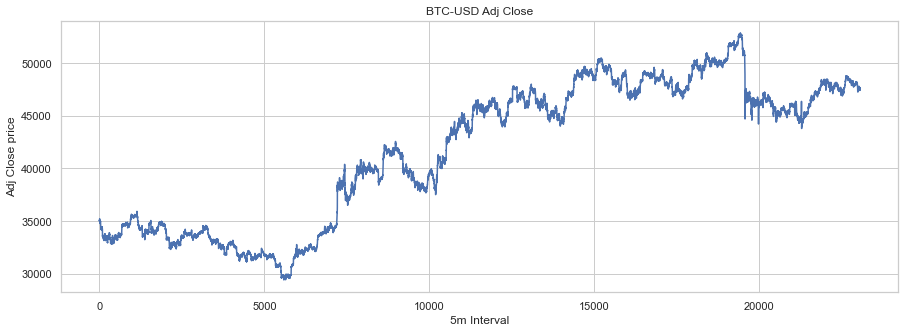

In [81]:
data['BTC-USD Adj Close'].plot(figsize=(15,5))
plt.xlabel("5m Interval")
plt.ylabel("Adj Close price")
plt.title("BTC-USD Adj Close")

## Augmented Dickey- Fuller Test - BTC-USD Adj Close 

In [82]:
#Augmented Dickey-Filler Test - 
X = data["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -1.012118
p-value: 0.748819
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [83]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTC['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
        
kpss_test(BTC)

 KPSS Statistics:5.590457369951909
 p-value: 0.01
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Result: The series is not stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series BTC-USD

In [84]:
BTC_stationary = BTC.diff().dropna()
BTC_stationary

,BTC-USD Adj Close
1,32.839844
2,63.894531
3,-38.976562
4,-34.730469
5,-9.753906
...,...
23060,38.851562
23061,30.152344
23062,-16.246094
23063,23.023438


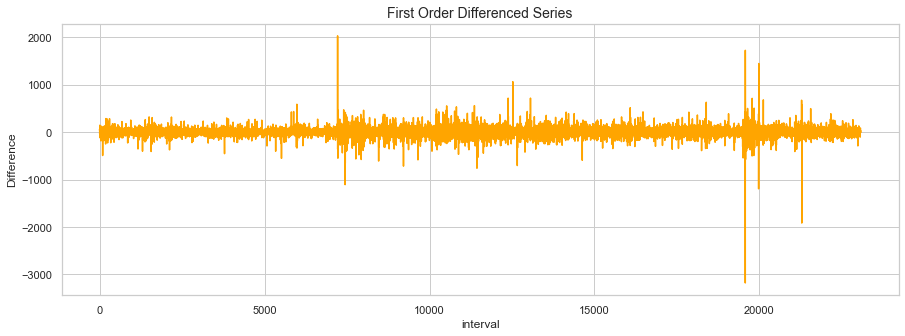

In [85]:
plt.figure(figsize=(15, 5))
plt.plot(BTC_stationary, color = 'orange')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference

In [86]:
X = BTC_stationary["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -47.426928
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time series in stationary


  ## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [87]:
def kpss_test(BTC):
    statistic , p_value , n_lags, critical_values = kpss(BTC_stationary['BTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
kpss_test(BTC_stationary)

 KPSS Statistics:0.08949280850451408
 p-value: 0.1
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# LTC-USD

In [91]:
LTC = df[['LTC-USD Adj Close']]
LTC.dropna()

,LTC-USD Adj Close
0,143.405853
1,143.584885
2,143.986786
3,143.898438
4,143.712845
...,...
23060,175.631119
23061,175.702255
23062,175.625031
23063,175.821609


Text(0.5, 1.0, 'LTC-USD Adj Close')

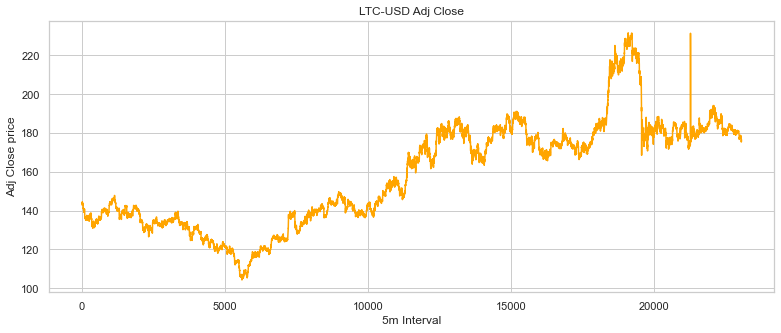

In [92]:
data['LTC-USD Adj Close'].plot(figsize=(13,5),color = 'orange')
plt.xlabel("5m Interval")
plt.ylabel("Adj Close price")
plt.title("LTC-USD Adj Close")

## Augmented Dickey-Fuller Test - LTC_USD Adj Close

In [93]:
#Augmented Dickey-Filler Test - 
X = data["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -1.262956
p-value: 0.645945
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [94]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTC['LTC-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
kpss_test(LTC)

 KPSS Statistics:3.195255574847393
 p-value: 0.01
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series LTC-USD

In [95]:
LTC_stationary = LTC.diff().dropna()
LTC_stationary

,LTC-USD Adj Close
1,0.179031
2,0.401901
3,-0.088348
4,-0.185593
5,-0.096191
...,...
23060,0.090088
23061,0.071136
23062,-0.077225
23063,0.196579


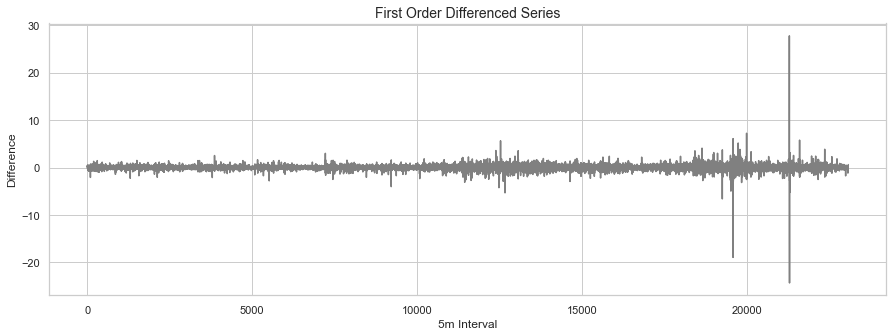

In [96]:
plt.figure(figsize=(15, 5))
plt.plot(LTC_stationary, color = 'grey')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('5m Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference time series

In [97]:
X = LTC_stationary["LTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -23.597470
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time series in stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [98]:
def kpss_test(LTC):
    statistic , p_value , n_lags, critical_values = kpss(LTC_stationary['LTC-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
        
kpss_test(LTC_stationary)

 KPSS Statistics:0.07031198647654359
 p-value: 0.1
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ETH-USD

In [99]:
ETH = df[['ETH-USD Adj Close']]
ETH

,ETH-USD Adj Close
0,2260.587402
1,2260.957275
2,2267.362061
3,2266.119629
4,2263.348389
...,...
23060,3344.405518
23061,3344.740723
23062,3342.938965
23063,3344.929443


Text(0.5, 1.0, 'ETH-USD Adj Close')

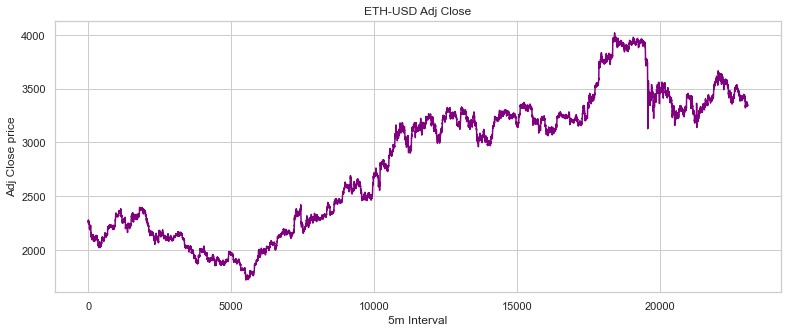

In [101]:
data['ETH-USD Adj Close'].plot(figsize=(13,5), color = 'purple')
plt.xlabel("5m Interval")
plt.ylabel("Adj Close price")
plt.title("ETH-USD Adj Close")

## Augmented Dickey- Fuller Test ETH-USD Adj Close

In [102]:
#Augmented Dickey-Filler Test - 
X = ETH["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.932676
p-value: 0.777021
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

In [103]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETH['ETH-USD Adj Close'],'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
         print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
kpss_test(ETH)

 KPSS Statistics:3.6092782683418405
 p-value: 0.01
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Failed to Reject Ho - Time Series is Non-Stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Difference time series ETH-USD

In [104]:
ETH_stationary = ETH.diff().dropna()
ETH_stationary

,ETH-USD Adj Close
1,0.369873
2,6.404785
3,-1.242432
4,-2.771240
5,-2.592773
...,...
23060,-0.632080
23061,0.335205
23062,-1.801758
23063,1.990479


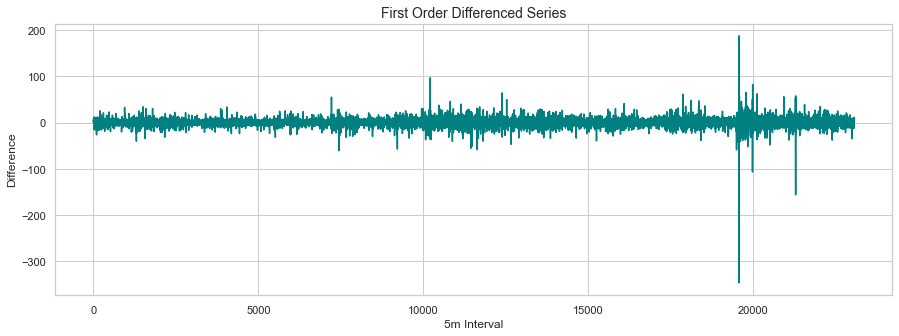

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(ETH_stationary, color = 'teal')
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('5m Interval', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

## Augmented Dickey-Fuller Test after difference time series

In [106]:
X = ETH_stationary["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -24.460894
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time series in stationary


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) after difference time series

In [107]:
def kpss_test(ETH):
    statistic , p_value , n_lags, critical_values = kpss(ETH_stationary['ETH-USD Adj Close'], 'ct')
    print(f' KPSS Statistics:{statistic}')
    print (f' p-value: {p_value}')   
    print(f' num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key}:{value}')
    if p_value < 0.05:
        print("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
        print("Reject Ho - Time series in stationary")
        
        
kpss_test(ETH_stationary)

 KPSS Statistics:0.10723598574456801
 p-value: 0.1
 num lags: 47
Critical Values:
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216
Reject Ho - Time series in stationary


C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anoop\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [11]:
data1 = df[['BTC-USD Adj Close','LTC-USD Adj Close']]
data1

,BTC-USD Adj Close,LTC-USD Adj Close
0,34984.894531,143.405853
1,35017.734375,143.584885
2,35081.628906,143.986786
3,35042.652344,143.898438
4,35007.921875,143.712845
...,...,...
23060,47443.453125,175.631119
23061,47473.605469,175.702255
23062,47457.359375,175.625031
23063,47480.382812,175.821609


In [27]:
data2 = df[['LTC-USD Adj Close','ETH-USD Adj Close']]
data2

,LTC-USD Adj Close,ETH-USD Adj Close
0,143.405853,2260.587402
1,143.584885,2260.957275
2,143.986786,2267.362061
3,143.898438,2266.119629
4,143.712845,2263.348389
...,...,...
23060,175.631119,3344.405518
23061,175.702255,3344.740723
23062,175.625031,3342.938965
23063,175.821609,3344.929443


In [110]:
np.random.seed(0)
data2 = np.random.normal(0,1,19612)
stats.jarque_bera(data2)

Jarque_beraResult(statistic=2.077961952980567, pvalue=0.353815044166913)

In [28]:
data3 = df[['ETH-USD Adj Close','BTC-USD Adj Close']]
data3

,ETH-USD Adj Close,BTC-USD Adj Close
0,2260.587402,34984.894531
1,2260.957275,35017.734375
2,2267.362061,35081.628906
3,2266.119629,35042.652344
4,2263.348389,35007.921875
...,...,...
23060,3344.405518,47443.453125
23061,3344.740723,47473.605469
23062,3342.938965,47457.359375
23063,3344.929443,47480.382812


In [112]:
np.random.seed(0)
data3 = np.random.normal(0,1,19612)
stats.jarque_bera(data3)

Jarque_beraResult(statistic=2.077961952980567, pvalue=0.353815044166913)

In [78]:
data4 = df[['Date','BTC-USD Adj Close','LTC-USD Adj Close','ETH-USD Adj Close']]
data4.round(3)

,Date,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
0,2021-07-01,34984.895,143.406,2260.587
1,2021-07-01,35017.734,143.585,2260.957
2,2021-07-01,35081.629,143.987,2267.362
3,2021-07-01,35042.652,143.898,2266.120
4,2021-07-01,35007.922,143.713,2263.348
...,...,...,...,...
23060,2021-09-19,47443.453,175.631,3344.406
23061,2021-09-19,47473.605,175.702,3344.741
23062,2021-09-19,47457.359,175.625,3342.939
23063,2021-09-19,47480.383,175.822,3344.929


In [114]:
data4.corr().round(4)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,1.0000,0.9378,0.9666
LTC-USD Adj Close,0.9378,1.0000,0.9648
ETH-USD Adj Close,0.9666,0.9648,1.0000


# Returns

In [115]:
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt.columns = [ 'BTC_RET','ETH_RET','LTC_RET',]
dt

,BTC_RET,ETH_RET,LTC_RET
1,0.000939,0.000164,0.001248
2,0.001825,0.002833,0.002799
3,-0.001111,-0.000548,-0.000614
4,-0.000991,-0.001223,-0.001290
5,-0.000279,-0.001146,-0.000669
...,...,...,...
23060,0.000820,-0.000189,0.000513
23061,0.000636,0.000100,0.000405
23062,-0.000342,-0.000539,-0.000440
23063,0.000485,0.000595,0.001119


## Cumulative Returns

In [116]:
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dtc =normalize_and_accumulate_series(data)

dtc.columns = [ 'BTC_C.RET','ETH_C.RET','LTC_C.RET']
dtc

,BTC_C.RET,ETH_C.RET,LTC_C.RET
1,0.000939,0.000164,0.001248
2,0.002763,0.002996,0.004047
3,0.001652,0.002448,0.003434
4,0.000661,0.001226,0.002144
5,0.000383,0.000080,0.001475
...,...,...,...
23060,0.352288,0.472481,0.318490
23061,0.352924,0.472582,0.318895
23062,0.352582,0.472043,0.318456
23063,0.353067,0.472638,0.319575


## THE PERCENTAGE CHANGE PLOT

<ipython-input-117-4d6cf09beee7>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


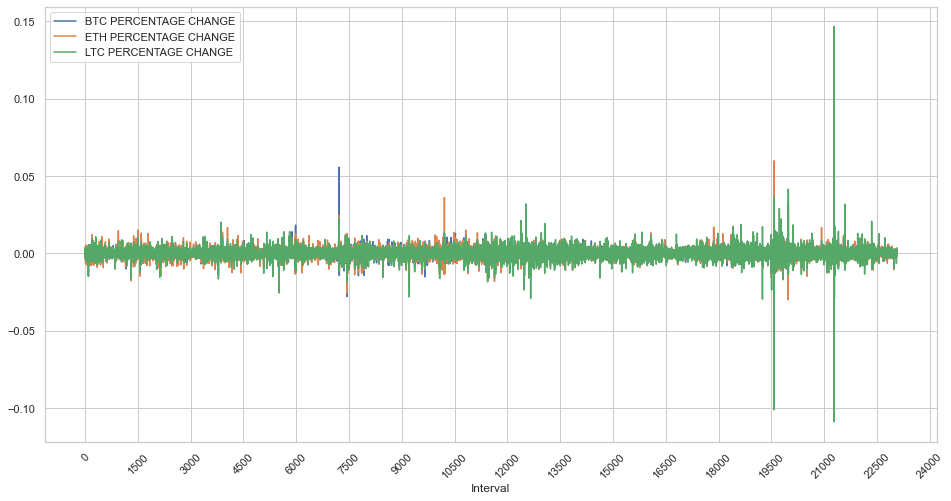

In [117]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dt['BTC_RET'],label='BTC PERCENTAGE CHANGE')
plt.plot(dt['ETH_RET'],label='ETH PERCENTAGE CHANGE')
plt.plot(dt['LTC_RET'],label='LTC PERCENTAGE CHANGE')
plt.xlabel("Interval")

ax.grid(True)
plt.legend(loc='best')
plt.show()

## THE CUMULATIVE RETURN PLOT

<ipython-input-118-8281f64292ea>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


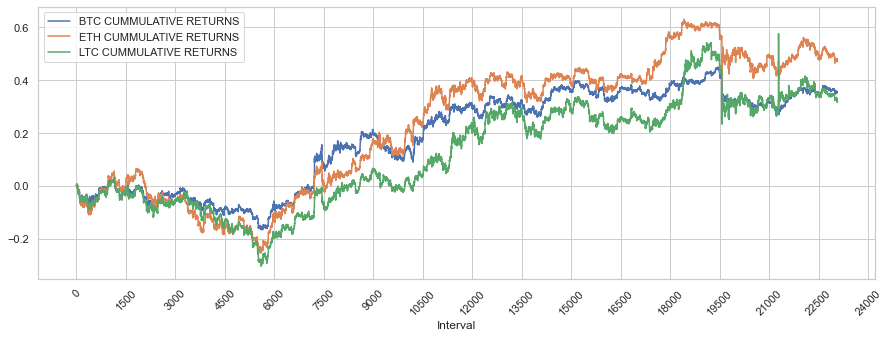

In [118]:
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dtc['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.xlabel("Interval")
ax.grid(True)
plt.legend(loc='best')
plt.show()

In [120]:
def corr(data1,data2):
    #data1 and data2 should be in np arrays#
    mean1=data1.mean()
    mean2=data2.mean()
    std1= data1.std()
    std2= data2.std()
    corr =((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

In [121]:
stock_name_1 ='BTC_RET'
stock_name_2='ETH_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and ETH_RET is 0.848062
Cointegration between BTC_RET and ETH_RET is 0.000000


In [122]:
stock_name_1 ='BTC_RET'
stock_name_2='LTC_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between BTC_RET and LTC_RET is 0.733779
Cointegration between BTC_RET and LTC_RET is 0.000000


In [123]:
stock_name_1 ='ETH_RET'
stock_name_2='LTC_RET'
score,pvalue,_=coint(dt[stock_name_1],dt[stock_name_2])
correlation = corr(dt[stock_name_1],dt[stock_name_2])
print('correlation between %s and %s is %f'%(stock_name_1, stock_name_2,correlation))
print('Cointegration between %s and %s is %f'%(stock_name_1,stock_name_2,pvalue))

correlation between ETH_RET and LTC_RET is 0.747810
Cointegration between ETH_RET and LTC_RET is 0.000000


<AxesSubplot:>

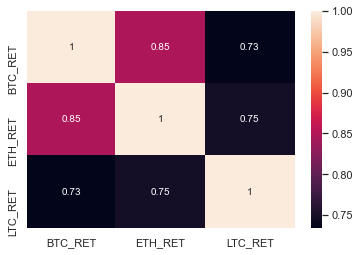

In [124]:
import seaborn as sn
corrMatrix = dt.corr()
sn.heatmap(corrMatrix, annot=True)

# Moving Average model

## BTC_USD Returns

In [127]:
df['BTC_ret'] = df['BTC-USD Adj Close'].pct_change()
BTC1 = pd.DataFrame(df['BTC_ret'].dropna())
BTC1

,BTC_ret
1,0.000939
2,0.001825
3,-0.001111
4,-0.000991
5,-0.000279
...,...
23060,0.000820
23061,0.000636
23062,-0.000342
23063,0.000485


## LTC_USD Returns

In [74]:
df['LTC_ret'] = df['LTC-USD Adj Close'].pct_change()
LTC1 = pd.DataFrame(df['LTC_ret'].dropna())
LTC1

,LTC_ret
1,0.001248
2,0.002799
3,-0.000614
4,-0.001290
5,-0.000669
...,...
23060,0.000513
23061,0.000405
23062,-0.000440
23063,0.001119


## ETH_USD Returns

In [75]:
df['ETH_ret'] = df['ETH-USD Adj Close'].pct_change()
ETH1 = pd.DataFrame(df['ETH_ret'].dropna())
ETH1

,ETH_ret
1,0.000164
2,0.002833
3,-0.000548
4,-0.001223
5,-0.001146
...,...
23060,-0.000189
23061,0.000100
23062,-0.000539
23063,0.000595


In [79]:
#Covariance
data4.cov().round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,44417150.42,168830.31,4017956.98
LTC-USD Adj Close,168830.31,729.61,16252.93
ETH-USD Adj Close,4017956.98,16252.93,388983.00


In [80]:
data4.describe().round(2)

,BTC-USD Adj Close,LTC-USD Adj Close,ETH-USD Adj Close
count,23065.00,23065.00,23065.00
mean,41717.74,158.29,2821.66
std,6664.62,27.01,623.69
min,29393.92,104.33,1722.51
25%,34182.31,135.80,2197.04
50%,44546.65,163.71,3057.76
75%,47448.51,180.29,3290.40
max,52850.43,231.33,4018.24


In [68]:
# Median
pd.DataFrame(data4.median())

<ipython-input-68-0131218cedd0>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  pd.DataFrame(data4.median())


,0
BTC-USD Adj Close,40809.541016
LTC-USD Adj Close,144.354805
ETH-USD Adj Close,2611.011963


# Training and Testing

## BTC - LTC Pairs

In [12]:
import arch.unitroot as at

In [13]:
int1 = data1.loc[:,['BTC-USD Adj Close','LTC-USD Adj Close']]

In [14]:
#Training and testing range
tint1 = int1[:18451]
tint1.columns = ['BTC-USD Adj Close','LTC-USD Adj Close']
fint1 = int1[18451:]
fint1.columns = ['BTC-USD Adj Close','LTC-USD Adj Close']

In [15]:
tbtc = tint1['BTC-USD Adj Close']
tltc = tint1['LTC-USD Adj Close']
rtbtc = tbtc.pct_change(1).dropna()
rtltc = tltc.pct_change(1).dropna()


In [16]:
print('')
print('BTC-LTC Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtbtc).join(rtltc).corr(), 3))
print('')


BTC-LTC Returns Correlation

                   BTC-USD Adj Close  LTC-USD Adj Close
BTC-USD Adj Close              1.000              0.781
LTC-USD Adj Close              0.781              1.000



No handles with labels found to put in legend.
No handles with labels found to put in legend.


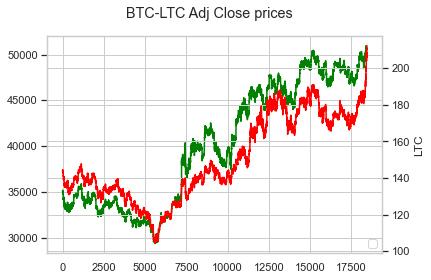

In [17]:
fig1,ax1 = plt.subplots()
ax1.plot(tbtc, color = 'green')
ax1.legend(loc='lower left')
ax2 = ax1.twinx()
ax2.plot(tltc,color = 'red')
ax1.legend(loc='lower right')
plt.ylabel('LTC')
plt.xlabel('BTC')
plt.suptitle('BTC-LTC Adj Close prices')
plt.show()


In [18]:
# 4. Pairs Spread Co-Integration

# 4.1. BTC-LTC Spread Calculation
# OLS regression doesn't include constant
tintsp1 = tbtc - rg.OLS(tbtc, tltc).fit().params[0] * tltc
tintsp1

0       -3445.256709
1       -3460.394005
2       -3504.201672
3       -3519.502479
4       -3504.497504
            ...     
18446   -5622.101735
18447   -5790.820201
18448   -5779.458261
18449   -5830.720604
18450   -6329.609991
Length: 18451, dtype: float64

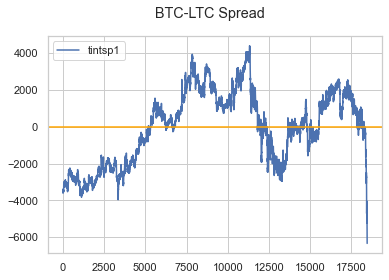

In [19]:
# 4.2. BTC-LTC Spread Chart
fig2, ax = plt.subplots()
ax.plot(tintsp1, label='tintsp1')
ax.axhline(tintsp1.mean(), color='orange')
ax.legend(loc='upper left')
plt.suptitle('BTC-LTC Spread')
plt.show()


In [20]:
# 4.3. BTC-LTC Non-Stationary Prices
print('== BTC Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tbtc, trend='ct'))
print('')
print('== LTC Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tltc, trend='ct'))
print('')

== BTC Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.704
P-value                         0.235
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== LTC Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.092
P-value                         0.550
Lags                                7
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [21]:
# 4.3. BTC-LTC Non-Stationary Prices
print('== BTC Prices Phillips-Perron Test ==')
print('')
print(at.PhillipsPerron(tbtc, trend='ct'))
print('')
print('== LTC Prices Phillips-Perron Test ==')
print('')
print(at.PhillipsPerron(tltc, trend='ct'))
print('')

== BTC Prices Phillips-Perron Test ==

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.679
P-value                         0.245
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== LTC Prices Phillips-Perron Test ==

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.057
P-value                         0.570
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [22]:
# 4.4. BTC-LTC Stationary Price Differences
print('== BTC Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tbtc.diff(1).dropna(), trend='ct'))
print('')
print('== LTC Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tltc.diff(1).dropna(), trend='ct'))
print('')

== BTC Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -40.865
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== LTC Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -44.510
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [23]:
# 4.4. BTC-LTC Stationary Price Differences
print('== BTC Prices Differences Phillips-Perron Test ==')
print('')
print(at.PhillipsPerron(tbtc.diff(1).dropna(), trend='ct'))
print('')
print('== LTC Prices Differences Phillips-Perron Test ==')
print('')
print(at.PhillipsPerron(tltc.diff(1).dropna(), trend='ct'))
print('')

== BTC Prices Differences Phillips-Perron Test ==

     Phillips-Perron Test (Z-tau)    
Test Statistic               -135.717
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== LTC Prices Differences Phillips-Perron Test ==

     Phillips-Perron Test (Z-tau)    
Test Statistic               -132.536
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [24]:
# 4.5. BTC-LTC Spread Co-Integration Tests
print('== BTC-LTC Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(tintsp1, trend='ct'))
print('')
print('== BTC-LTC Spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(tintsp1, trend='ct', test_type='rho'))
print('')

== BTC-LTC Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.745
P-value                         0.970
Lags                               43
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== BTC-LTC Spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.968
P-value                         0.893
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.34 (1%), -21.70 (5%), -18.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



# 5. Pairs Trading Strategy

In [25]:
# 5.1. BTC-LTC Rolling Spread Z-Score Calculation
fbtc = fint1['BTC-USD Adj Close']
fltc = fint1['LTC-USD Adj Close']
fintsp1 = fbtc - rg.OLS(tbtc, tltc).fit().params[0] * fltc
fintz1 = (fintsp1 - fintsp1.rolling(window=21).mean()) / fintsp1.rolling(window=21).std()
fintz1

18451         NaN
18452         NaN
18453         NaN
18454         NaN
18455         NaN
           ...   
23060    1.192459
23061    1.164087
23062    1.103729
23063    0.837166
23064    0.205695
Length: 4614, dtype: float64

## LTC-ETH Pairs

In [29]:
int2 = data2.loc[:,['ETH-USD Adj Close','LTC-USD Adj Close']]

In [30]:
#Training and testing range
tint2 = data2[:18451]
tint2.columns = ['LTC-USD Adj Close','ETH-USD Adj Close']
fint2 = data2[18451:]
fint2.columns = ['LTC-USD Adj Close','ETH-USD Adj Close']

In [31]:
tdge= tint2['LTC-USD Adj Close']
teth = tint2['ETH-USD Adj Close']
rtdge = tdge.pct_change(1).dropna()
rteth = teth.pct_change(1).dropna()

In [32]:
print('')
print('LTC-ETH Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtdge).join(rteth).corr(), 4))
print('')


LTC-ETH Returns Correlation

                   LTC-USD Adj Close  ETH-USD Adj Close
LTC-USD Adj Close             1.0000             0.7956
ETH-USD Adj Close             0.7956             1.0000



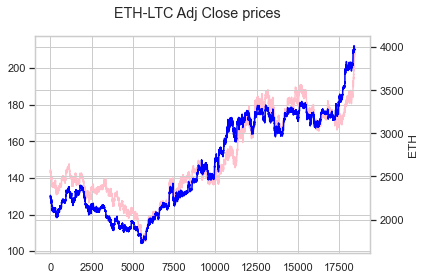

In [33]:
fig1,ax1 = plt.subplots()
ax1.plot(tdge, color = 'pink')
ax2 = ax1.twinx()
ax2.plot(teth,color = 'blue')
plt.ylabel('ETH')
plt.xlabel('LTC')
plt.suptitle('ETH-LTC Adj Close prices')
plt.show()


In [34]:
# 4. Pairs Spread Co-Integration

# 4.1. LTC-ETH Spread Calculation
# OLS regression doesn't include constant
tintsp2 = tltc - rg.OLS(tltc, teth).fit().params[0] * teth
tintsp2

0        16.707373
1        16.865675
2        16.908609
3        16.889894
4        16.859621
           ...    
18446   -13.181067
18447   -12.779856
18448   -12.763260
18449   -12.564870
18450   -10.743696
Length: 18451, dtype: float64

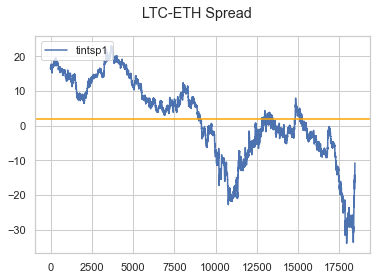

In [35]:
# 4.2. LTC-ETH Spread Chart
fig2, ax = plt.subplots()
ax.plot(tintsp2, label='tintsp1')
ax.axhline(tintsp2.mean(), color='orange')
ax.legend(loc='upper left')
plt.suptitle('LTC-ETH Spread')
plt.show()


In [36]:
# 4.3. LTC-ETH Non-Stationary Prices
print('== LTC Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tltc, trend='ct'))
print('')
print('== ETH Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(teth, trend='ct'))
print('')

== LTC Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.092
P-value                         0.550
Lags                                7
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.983
P-value                         0.610
Lags                                7
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [37]:
# 4.4. LTC-ETH Stationary Price Differences
print('== LTC Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tltc.diff(1).dropna(), trend='ct'))
print('')
print('== ETH Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(teth.diff(1).dropna(), trend='ct'))
print('')

== LTC Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -44.510
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -48.665
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [38]:
# 4.5. LTC-ETH Spread Co-Integration Tests
print('== LTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(tintsp2, trend='ct'))
print('')
print('== LTC-ETH Spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(tintsp2, trend='ct', test_type='rho'))
print('')

== LTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.547
P-value                         0.305
Lags                               44
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== LTC-ETH Spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic                -13.001
P-value                         0.265
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.34 (1%), -21.70 (5%), -18.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



## ETH-BTC

In [39]:
int3 = data3.loc[:,['BTC-USD Adj Close','ETH-USD Adj Close']]

In [40]:
#Training and testing range
tint3 = data3[:18451]
tint3.columns = ['ETH-USD Adj Close','BTC-USD Adj Close']
fint3 = data3[18451:]
fint3.columns = ['ETH-USD Adj Close','BTC-USD Adj Close']

In [41]:
teth= tint3['ETH-USD Adj Close']
tbtc = tint3['BTC-USD Adj Close']
rteth = teth.pct_change(1).dropna()
rtbtc = tbtc.pct_change(1).dropna()

In [42]:
print('')
print('ETH-BTC Returns Correlation')
print('')
print(np.round(pd.DataFrame(rteth).join(rtbtc).corr(), 4))
print('')


ETH-BTC Returns Correlation

                   ETH-USD Adj Close  BTC-USD Adj Close
ETH-USD Adj Close             1.0000             0.8279
BTC-USD Adj Close             0.8279             1.0000



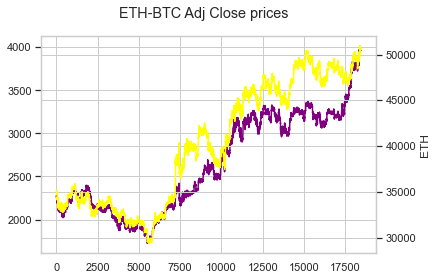

In [43]:
fig1,ax1 = plt.subplots()
ax1.plot(teth, color = 'purple')
ax2 = ax1.twinx()
ax2.plot(tbtc,color = 'yellow')
plt.ylabel('ETH')
plt.xlabel('DOGE')
plt.suptitle('ETH-BTC Adj Close prices')
plt.show()


In [44]:
# 4. Pairs Spread Co-Integration

# 4.1. BTC-ETH Spread Calculation
# OLS regression doesn't include constant
tintsp3 = tbtc- rg.OLS(tbtc, teth).fit().params[0] * teth
tintsp3

0         960.249694
1         987.522489
2         955.017058
3         934.740633
4         941.720768
            ...     
18446   -9280.554820
18447   -9341.973294
18448   -9326.133771
18449   -9324.122358
18450   -9334.990458
Length: 18451, dtype: float64

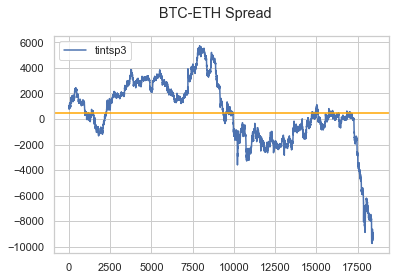

In [45]:
# 4.2. BTC-ETH Spread Chart
fig2, ax = plt.subplots()
ax.plot(tintsp3, label='tintsp3')
ax.axhline(tintsp3.mean(), color='orange')
ax.legend(loc='upper left')
plt.suptitle('BTC-ETH Spread')
plt.show()


In [46]:
# 4.3. BTC-ETH Non-Stationary Prices
print('== BTC Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tbtc, trend='ct'))
print('')
print('== ETH Prices Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(teth, trend='ct'))
print('')

== BTC Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.704
P-value                         0.235
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.983
P-value                         0.610
Lags                                7
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [47]:
# 4.4. BTC-ETH Stationary Price Differences
print('== BTC Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(tbtc.diff(1).dropna(), trend='ct'))
print('')
print('== ETH Prices Differences Augmented Dickey-Fuller Test ==')
print('')
print(at.ADF(teth.diff(1).dropna(), trend='ct'))
print('')

== BTC Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -40.865
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== ETH Prices Differences Augmented Dickey-Fuller Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                -48.665
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



In [48]:
# 4.5. BTC-ETH Spread Co-Integration Tests
print('== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==')
print('')
print(at.ADF(tintsp3, trend='ct'))
print('')
print('== BTC-ETH Spread Phillips-Perron Co-Integration Test ==')
print('')
print(at.PhillipsPerron(tintsp3, trend='ct', test_type='rho'))
print('')

== BTC-ETH Spread Augmented Dickey-Fuller Co-Integration Test ==

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.406
P-value                         0.987
Lags                                7
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

== BTC-ETH Spread Phillips-Perron Co-Integration Test ==

     Phillips-Perron Test (Z-rho)    
Test Statistic                 -1.556
P-value                         0.979
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.34 (1%), -21.70 (5%), -18.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



# Spread

## BTC-LTC Correlation

In [202]:
df['Spread'] = BTC['BTC-USD Adj Close'] - LTC['LTC-USD Adj Close']
df['Ratio'] = BTC['BTC-USD Adj Close'] / LTC['LTC-USD Adj Close']
mean = df['Ratio'].mean()
corr = BTC['BTC-USD Adj Close'].corr(LTC['LTC-USD Adj Close'])
print(corr)
df.round(2)

0.9378430108650813


,Date,Time,BTC-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,BTC-USD Close,ETH-USD Close,LTC-USD Close,BTC-USD High,ETH-USD High,...,LTC-USD Low,BTC-USD Open,ETH-USD Open,LTC-USD Open,BTC-USD Volume,ETH-USD Volume,LTC-USD Volume,BTC_ret,Spread,Ratio
0,2021-07-01,00:00:00+01:00,34984.89,2260.59,143.41,34984.89,2260.59,143.41,34994.21,2263.35,...,143.21,34822.15,2254.17,143.21,0,0,0,NaN,34841.49,243.96
1,2021-07-01,00:05:00+01:00,35017.73,2260.96,143.58,35017.73,2260.96,143.58,35024.24,2261.18,...,143.31,34956.55,2257.22,143.31,24279040,0,0,0.0,34874.15,243.88
2,2021-07-01,00:10:00+01:00,35081.63,2267.36,143.99,35081.63,2267.36,143.99,35111.43,2267.61,...,143.71,35056.14,2264.16,143.71,164657152,120766464,83584,0.0,34937.64,243.64
3,2021-07-01,00:15:00+01:00,35042.65,2266.12,143.90,35042.65,2266.12,143.90,35092.30,2268.98,...,143.88,35092.30,2268.98,144.07,132653056,131840000,0,-0.0,34898.75,243.52
4,2021-07-01,00:20:00+01:00,35007.92,2263.35,143.71,35007.92,2263.35,143.71,35042.98,2267.71,...,143.71,35034.82,2265.56,143.90,30140416,15161344,0,-0.0,34864.21,243.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,2021-09-19,19:05:00+01:00,47443.45,3344.41,175.63,47443.45,3344.41,175.63,47443.45,3345.84,...,175.42,47383.68,3342.42,175.42,0,0,0,0.0,47267.82,270.13
23061,2021-09-19,19:10:00+01:00,47473.61,3344.74,175.70,47473.61,3344.74,175.70,47493.65,3349.13,...,175.70,47476.88,3349.12,175.79,0,0,3144192,0.0,47297.90,270.19
23062,2021-09-19,19:15:00+01:00,47457.36,3342.94,175.63,47457.36,3342.94,175.63,47493.28,3346.60,...,175.63,47493.28,3346.60,175.70,0,0,2382848,-0.0,47281.73,270.22
23063,2021-09-19,19:20:00+01:00,47480.38,3344.93,175.82,47480.38,3344.93,175.82,47480.38,3344.93,...,175.55,47447.54,3341.30,175.62,0,0,27392,0.0,47304.56,270.05


In [203]:
print(adfuller(df['Ratio'])[0:5])

(-2.4973775807681466, 0.11611369223044399, 26, 23038, {'1%': -3.4306338800578144, '5%': -2.8616654659197307, '10%': -2.566836781922432})


In [204]:
import statsmodels.tsa.stattools as ts

## BTC-LTC Cointegration

In [206]:
#Cointegration
result = ts.coint(BTC['BTC-USD Adj Close'], LTC['LTC-USD Adj Close'])
print(result)

(-2.438815512130437, 0.30669827727110377, array([-3.89691491, -3.33639493, -3.04463389]))


# LTC-ETH

In [207]:
df['Spread'] = LTC['LTC-USD Adj Close'] - ETH['ETH-USD Adj Close']
df['Ratio'] = LTC['LTC-USD Adj Close'] / ETH['ETH-USD Adj Close']
mean = df['Ratio'].mean()
corr = LTC['LTC-USD Adj Close'].corr(ETH['ETH-USD Adj Close'])
print(corr)
df.round(2)

0.9647650429208208


,Date,Time,BTC-USD Adj Close,ETH-USD Adj Close,LTC-USD Adj Close,BTC-USD Close,ETH-USD Close,LTC-USD Close,BTC-USD High,ETH-USD High,...,LTC-USD Low,BTC-USD Open,ETH-USD Open,LTC-USD Open,BTC-USD Volume,ETH-USD Volume,LTC-USD Volume,BTC_ret,Spread,Ratio
0,2021-07-01,00:00:00+01:00,34984.89,2260.59,143.41,34984.89,2260.59,143.41,34994.21,2263.35,...,143.21,34822.15,2254.17,143.21,0,0,0,NaN,-2117.18,0.06
1,2021-07-01,00:05:00+01:00,35017.73,2260.96,143.58,35017.73,2260.96,143.58,35024.24,2261.18,...,143.31,34956.55,2257.22,143.31,24279040,0,0,0.0,-2117.37,0.06
2,2021-07-01,00:10:00+01:00,35081.63,2267.36,143.99,35081.63,2267.36,143.99,35111.43,2267.61,...,143.71,35056.14,2264.16,143.71,164657152,120766464,83584,0.0,-2123.38,0.06
3,2021-07-01,00:15:00+01:00,35042.65,2266.12,143.90,35042.65,2266.12,143.90,35092.30,2268.98,...,143.88,35092.30,2268.98,144.07,132653056,131840000,0,-0.0,-2122.22,0.06
4,2021-07-01,00:20:00+01:00,35007.92,2263.35,143.71,35007.92,2263.35,143.71,35042.98,2267.71,...,143.71,35034.82,2265.56,143.90,30140416,15161344,0,-0.0,-2119.64,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,2021-09-19,19:05:00+01:00,47443.45,3344.41,175.63,47443.45,3344.41,175.63,47443.45,3345.84,...,175.42,47383.68,3342.42,175.42,0,0,0,0.0,-3168.77,0.05
23061,2021-09-19,19:10:00+01:00,47473.61,3344.74,175.70,47473.61,3344.74,175.70,47493.65,3349.13,...,175.70,47476.88,3349.12,175.79,0,0,3144192,0.0,-3169.04,0.05
23062,2021-09-19,19:15:00+01:00,47457.36,3342.94,175.63,47457.36,3342.94,175.63,47493.28,3346.60,...,175.63,47493.28,3346.60,175.70,0,0,2382848,-0.0,-3167.31,0.05
23063,2021-09-19,19:20:00+01:00,47480.38,3344.93,175.82,47480.38,3344.93,175.82,47480.38,3344.93,...,175.55,47447.54,3341.30,175.62,0,0,27392,0.0,-3169.11,0.05


In [208]:
print(adfuller(df['Ratio'])[0:5])

(-1.8027676213292825, 0.37908851475030736, 18, 23046, {'1%': -3.430633781503033, '5%': -2.861665422363747, '10%': -2.566836758738465})


## LTC-ETH Cointegration

In [209]:
#Cointegration
result = ts.coint(LTC['LTC-USD Adj Close'], ETH['ETH-USD Adj Close'])
print(result)

(-3.2277573974871627, 0.06540721392923722, array([-3.89691491, -3.33639493, -3.04463389]))


## BTC-ETH Cointegration

In [210]:
#Cointegration
result = ts.coint(BTC['BTC-USD Adj Close'], ETH['ETH-USD Adj Close'])
print(result)

(-1.9792313079239456, 0.5393556139878121, array([-3.89691491, -3.33639493, -3.04463389]))


## BTC- ETH Cointegration after first difference

In [96]:
#Cointegration
result = ts.coint(BTC1['BTC_ret'], ETH1['ETH_ret'])
print(result)

(-32.410991533225264, 0.0, array([-3.89699857, -3.3364416 , -3.04466628]))


## LTC-ETH Cointegration after first difference

In [97]:
#Cointegration
result = ts.coint(LTC1['LTC_ret'], ETH1['ETH_ret'])
print(result)

(-21.193266764167188, 0.0, array([-3.89699857, -3.3364416 , -3.04466628]))


## BTC-LTC Cointegration after first difference

In [98]:
#Cointegration
result = ts.coint(BTC1['BTC_ret'], LTC1['LTC_ret'])
print(result)

(-27.900482555762697, 0.0, array([-3.89699857, -3.3364416 , -3.04466628]))
